In [1]:
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit import Parameter, ParameterVector
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN

algorithm_globals.random_seed = 42

## Instantiation of QNNs

### EstimatorQNN

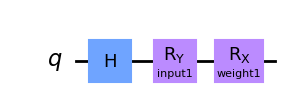

In [5]:
params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl", style="clifford")

In [6]:
observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

estimator_qnn = EstimatorQNN(circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]])
estimator_qnn

### SamplerQNN

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


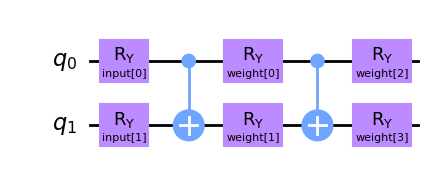

In [9]:
inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [10]:
sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

## Forward Pass

### Set-up: EstimatorQNN

In [11]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

print(f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input} \n")
print(f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nInput: {estimator_qnn_weights} \n")

Number of input features for EstimatorQNN: 1 
Input: [0.77395605] 

Number of trainable weights for EstimatorQNN: 1 
Input: [0.43887844] 



### Set-up: SamplerQNN

In [12]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

print(f"Number of input features for EstimatorQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input} \n")
print(f"Number of trainable weights for EstimatorQNN: {sampler_qnn.num_weights} \nInput: {sampler_qnn_weights} \n")

Number of input features for EstimatorQNN: 2 
Input: [0.85859792 0.69736803] 

Number of trainable weights for EstimatorQNN: 4 
Input: [0.09417735 0.97562235 0.7611397  0.78606431] 



### Forward pass with non-batched retrival

In [13]:
# EstimatorQNN
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)
print(f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}.\n")

# SamplerQNN
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)
print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward}. \nShape: {sampler_qnn_forward.shape}.\n")

Forward pass result for EstimatorQNN: [[0.2970094]]. 
Shape: (1, 1).

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]]. 
Shape: (1, 4).



### Forward pass with batched retrival

In [14]:
# EstimatorQNN
estimator_qnn_forward_batched = estimator_qnn.forward([estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights)
print(f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}. \nShape: {estimator_qnn_forward_batched.shape}.\n")

# SamplerQNN
sampler_qnn_forward_batched = sampler_qnn.forward([sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights)
print(f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}. \nShape: {sampler_qnn_forward_batched.shape}.\n")

Forward pass result for EstimatorQNN: [[0.2970094]
 [0.2970094]]. 
Shape: (2, 1).

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]
 [0.01826527 0.25735654 0.5267981  0.19758009]]. 
Shape: (2, 4).



## Backward Pass

### Without input gradients

In [16]:
# EstimatorQNN
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(estimator_qnn_input, estimator_qnn_weights)
print(f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}. \nShape: {estimator_qnn_input_grad}.\n")
print(f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}. \nShape: {estimator_qnn_weight_grad.shape}.\n")

# SamplerQNN
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_input, sampler_qnn_weights)
print(f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}. \nShape: {sampler_qnn_input_grad}.\n")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}. \nShape: {sampler_qnn_weight_grad.shape}.\n")

Input gradients for EstimatorQNN: None. 
Shape: None.

Weight gradients for EstimatorQNN: [[[0.63272767]]]. 
Shape: (1, 1, 1).

Input gradients for SamplerQNN: None. 
Shape: None.

Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]]. 
Shape: (1, 4, 4).



### With input gradients 

In [18]:
# EstimatorQNN
estimator_qnn.input_gradients = True
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(estimator_qnn_input, estimator_qnn_weights)
print(f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}. \nShape: {estimator_qnn_input_grad.shape}.\n")
print(f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}. \nShape: {estimator_qnn_weight_grad.shape}.\n")

# SamplerQNN
sampler_qnn.input_gradients = True
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(sampler_qnn_input, sampler_qnn_weights)
print(f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}. \nShape: {sampler_qnn_input_grad.shape}.\n")
print(f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}. \nShape: {sampler_qnn_weight_grad.shape}.\n")

Input gradients for EstimatorQNN: [[[0.3038852]]]. 
Shape: (1, 1, 1).

Weight gradients for EstimatorQNN: [[[0.63272767]]]. 
Shape: (1, 1, 1).

Input gradients for SamplerQNN: [[[-0.05844702 -0.10621091]
  [ 0.38798796 -0.19544083]
  [-0.34561132  0.09459601]
  [ 0.01607038  0.20705573]]]. 
Shape: (1, 4, 2).

Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]]. 
Shape: (1, 4, 4).



## EstimatorQNN with multiple observables

In [20]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(circuit=qc1, observables=[observable1, observable2], input_params=[params1[0]], weight_params=[params1[1]],)

estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(estimator_qnn_input, estimator_qnn_weights)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


## SamplerQNN with custom `interpret` or activation methods

In [22]:
# Using parity function with output shape := 2 as an example 
parity = lambda x: "{:b}".format(x).count("1")%2
output_shape = 2 # parity = 0, 1

sampler_qnn2 = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2, interpret=parity, output_shape=output_shape)

sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(sampler_qnn_input, sampler_qnn_weights)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")

Forward output for SamplerQNN1: (1, 4)
Forward output for SamplerQNN2: (1, 2)
Backward output for SamplerQNN1: (1, 4, 4)
Backward output for SamplerQNN2: (1, 2, 4)
